<a href="https://colab.research.google.com/github/mottasilvia/UCU-NLP/blob/proyecto_final/PLN_proyecto_final_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Mensajes   Usando Diferentes Modelos

Este notebook se enfoca en la clasificación de mensajes utilizando diversos enfoques de aprendizaje automático, incluyendo Random Forest, redes neuronales recurrentes (RNN, LSTM, GRU). Aquí se presentan los resultados

# RESULTADOS

## Resultados de los Modelos

| **Clase**                 | **Random Forest ** | | | | **RNN (LSTM)  ** | | | | **GRU** | | | |
|---------------------------|------------------------------|----|----|----|-------------------|----|----|----|------------|----|----|----|
|                           | **Precision**                | **Recall** | **F1-score** | **Support** | **Precision**    | **Recall** | **F1-score** | **Support** | **Precision** | **Recall** | **F1-score** | **Support** |
| agradecimiento o saludo   | 0.90                         | 0.93      | 0.91       | 476       | 0.93              | 0.90      | 0.92       | 476       | 0.92        | 0.93      | 0.93       | 476     |
| baja                      | 1.00                         | 0.62      | 0.77       | 16        | 1.00              | 0.62      | 0.77       | 16        | 0.77        | 0.62      | 0.69       | 16      |
| equivocado                | 0.85                         | 0.65      | 0.73       | 17        | 0.88              | 0.41      | 0.56       | 17        | 0.86        | 0.71      | 0.77       | 17      |
| glicemia                  | 1.00                         | 0.12      | 0.21       | 17        | 0.00              | 0.00      | 0.00       | 17        | 0.44        | 0.41      | 0.42       | 17      |
| medicación o turno        | 1.00                         | 0.23      | 0.37       | 35        | 0.40              | 0.60      | 0.48       | 35        | 0.47        | 0.51      | 0.49       | 35      |
| optin                     | 0.99                         | 0.93      | 0.96       | 364       | 0.99              | 0.94      | 0.96       | 364       | 0.97        | 0.94      | 0.95       | 364     |
| otros                     | 0.83                         | 0.48      | 0.61       | 81        | 0.78              | 0.47      | 0.58       | 81        | 0.71        | 0.68      | 0.70       | 81      |
| respuesta                 | 0.73                         | 0.90      | 0.81       | 396       | 0.76              | 0.92      | 0.83       | 396       | 0.83        | 0.86      | 0.84       | 396     |
| **accuracy**              | **0.86**                     |          |            | 1402      | **0.86**          |          |            | 1402      | **0.88**    |          |            | 1402    |
| **macro avg**             | 0.91                         | 0.61      | 0.67       | 1402      | 0.72              | 0.61      | 0.64       | 1402      | 0.75        | 0.71      | 0.73       | 1402    |
| **weighted avg**          | 0.88                         | 0.86      | 0.85       | 1402      | 0.87              | 0.86      | 0.86       | 1402      | 0.88        | 0.88      | 0.88       | 1402    |


# CONCLUSIONES

1. **Comparación General**
 -Random Forest Classifier: Muestra un buen rendimiento general pero tiene dificultades con clases menos frecuentes.
- RNN (LSTM) Model: Similar en precisión general al Random Forest, pero con una mejora en el recall para algunas clases específicas. Se beneficia del uso de embeddings aprendidos del corpus de entrenamiento.
- GRU Model: Ofrece el mejor rendimiento general, con altos valores de precisión, recall y f1-score en la mayoría de las clases. Al igual que el LSTM, se beneficia de los embeddings aprendidos del corpus de entrenamiento.
2. **Observaciones**
- Los modelos RNN (LSTM) y GRU, al utilizar embeddings aprendidos del corpus de entrenamiento, pueden capturar mejor las relaciones contextuales dentro de los mensajes, lo que resulta en un rendimiento superior en comparación con el modelo Random Forest para ciertas clases.
-A pesar de las mejoras en los modelos RNN y GRU, algunas clases con pocos ejemplos siguen siendo desafiantes y muestran la necesidad de más datos o técnicas de balanceo de clases.




Importación de Librerías y Configuración Inicial

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Import the RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report # Import necessary functions
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential # Import Sequential from tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN # Import recurrent layers from tensorflow.keras
from tensorflow.keras.layers import Dense, Activation, Dropout # Import core layers from tensorflow.keras
from tensorflow.keras.layers import BatchNormalization # Import BatchNormalization from tensorflow.keras
from tensorflow.keras.utils import to_categorical # Import to_categorical for one-hot encoding
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from tensorflow.keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D # Import additional layers from tensorflow.keras
from tensorflow.keras.preprocessing import sequence, text # Import preprocessing modules from tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping from tensorflow.keras


from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import tensorflow as tf


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import classification_report

In [3]:
# Verificar la disponibilidad de la GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


Num GPUs Available:  1
Default GPU Device: /device:GPU:0


In [4]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


Carga y Preprocesamiento de Datos

In [28]:
from google.colab import drive
drive.mount('/content/drive')
carpeta_laboratorios = "/"
path_laboratorios = '/content/drive/My Drive/'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# pandas, openpyxl y emoji
!pip install pandas openpyxl emoji

import pandas as pd
import emoji


Conversión de Emoticonos a Texto

In [30]:
# Diccionario de traducciones de emojis de inglés a español
emoji_translations = {
    ":grinning_face:": ":cara_sonriendo:",
    ":grinning_face_with_big_eyes:": ":cara_sonriendo_con_ojos_grandes:",
    ":grinning_face_with_smiling_eyes:": ":cara_sonriendo_con_ojos_sonrientes:",
    ":beaming_face_with_smiling_eyes:": ":cara_radiante_con_ojos_sonrientes:",
    ":grinning_squinting_face:": ":cara_sonriendo_con_ojos_cerrados:",
    ":grinning_face_with_sweat:": ":cara_sonriendo_con_sudor:",
    ":rolling_on_the_floor_laughing:": ":riendo_en_el_suelo:",
    ":face_with_tears_of_joy:": ":cara_con_lágrimas_de_alegría:",
    ":slightly_smiling_face:": ":cara_ligeramente_sonriente:",
    ":upside_down_face:": ":cara_al_revés:",
    ":winking_face:": ":cara_guiñando:",
    ":smiling_face_with_smiling_eyes:": ":cara_sonriendo_con_ojos_sonrientes:",
    ":smiling_face_with_halo:": ":cara_sonriendo_con_auréola:",
    ":smiling_face_with_hearts:": ":cara_sonriendo_con_corazones:",
    ":smiling_face_with_heart_eyes:": ":cara_sonriendo_con_ojos_de_corazón:",
    ":star_struck:": ":cara_deslumbrada:",
    ":face_blowing_a_kiss:": ":cara_lanzando_un_beso:",
    ":kissing_face:": ":cara_besando:",
    ":smiling_face:": ":cara_sonriente:",
    ":kissing_face_with_closed_eyes:": ":cara_besando_con_ojos_cerrados:",
    ":kissing_face_with_smiling_eyes:": ":cara_besando_con_ojos_sonrientes:",
    ":face_savoring_food:": ":cara_saboreando_comida:",
    ":face_with_tongue:": ":cara_con_lengua:",
    ":winking_face_with_tongue:": ":cara_guiñando_con_lengua:",
    ":zany_face:": ":cara_loca:",
    ":squinting_face_with_tongue:": ":cara_entrecerrada_con_lengua:",
    ":money_mouth_face:": ":cara_con_boca_de_dinero:",
    ":hugging_face:": ":cara_abrazando:",
    ":face_with_hand_over_mouth:": ":cara_con_mano_sobre_la_boca:",
    ":shushing_face:": ":cara_pidiendo_silencio:",
    ":thinking_face:": ":cara_pensando:",
    ":zipper_mouth_face:": ":cara_con_cierre_en_la_boca:",
    ":face_with_raised_eyebrow:": ":cara_con_ceja_levantada:",
    ":neutral_face:": ":cara_neutra:",
    ":expressionless_face:": ":cara_sin_expresión:",
    ":face_without_mouth:": ":cara_sin_boca:",
    ":smirking_face:": ":cara_sonriente:",
    ":unamused_face:": ":cara_no_divertida:",
    ":face_with_rolling_eyes:": ":cara_con_ojos_en_blanco:",
    ":grimacing_face:": ":cara_haciendo_mueca:",
    ":lying_face:": ":cara_mintiendo:",
    ":relieved_face:": ":cara_aliviada:",
    ":pensive_face:": ":cara_pensativa:",
    ":sleepy_face:": ":cara_somnolienta:",
    ":drooling_face:": ":cara_babeando:",
    ":sleeping_face:": ":cara_durmiendo:",
    ":face_with_medical_mask:": ":cara_con_mascarilla:",
    ":face_with_thermometer:": ":cara_con_termómetro:",
    ":face_with_head_bandage:": ":cara_con_venda_en_la_cabeza:",
    ":nauseated_face:": ":cara_nauseada:",
    ":face_vomiting:": ":cara_vomitando:",
    ":sneezing_face:": ":cara_estornudando:",
    ":hot_face:": ":cara_caliente:",
    ":cold_face:": ":cara_fría:",
    ":woozy_face:": ":cara_mareada:",
    ":dizzy_face:": ":cara_mareada:",
    ":exploding_head:": ":cabeza_explosiva:",
    ":cowboy_hat_face:": ":cara_con_sombrero_de_vaquero:",
    ":partying_face:": ":cara_festiva:",
    ":smiling_face_with_sunglasses:": ":cara_sonriendo_con_gafas_de_sol:",
    ":nerd_face:": ":cara_de_nerd:",
    ":face_with_monocle:": ":cara_con_monóculo:",
    ":confused_face:": ":cara_confundida:",
    ":worried_face:": ":cara_preocupada:",
    ":slightly_frowning_face:": ":cara_ligeramente_fruncida:",
    ":frowning_face:": ":cara_fruncida:",
    ":face_with_open_mouth:": ":cara_con_boca_abierta:",
    ":hushed_face:": ":cara_silenciosa:",
    ":astonished_face:": ":cara_asombrada:",
    ":flushed_face:": ":cara_sonrojada:",
    ":pleading_face:": ":cara_suplicante:",
    ":frowning_face_with_open_mouth:": ":cara_fruncida_con_boca_abierta:",
    ":anguished_face:": ":cara_angustiada:",
    ":fearful_face:": ":cara_temorosa:",
    ":cold_sweat:": ":sudor_frío:",
    ":disappointed_but_relieved_face:": ":cara_decepcionada_pero_aliviada:",
    ":crying_face:": ":cara_llorando:",
    ":loudly_crying_face:": ":cara_llorando_fuertemente:",
    ":face_screaming_in_fear:": ":cara_gritando_de_miedo:",
    ":confounded_face:": ":cara_confundida:",
    ":persevering_face:": ":cara_perseverante:",
    ":disappointed_face:": ":cara_decepcionada:",
    ":sweat:": ":sudor:",
    ":weary_face:": ":cara_cansada:",
    ":tired_face:": ":cara_fatigada:",
    ":yawning_face:": ":cara_bostezando:",
    ":face_with_steam_from_nose:": ":cara_con_vapor_saliendo_de_la_nariz:",
    ":pouting_face:": ":cara_haciendo_mueca:",
    ":angry_face:": ":cara_enojada:",
    ":face_with_symbols_on_mouth:": ":cara_con_símbolos_en_la_boca:",
    ":smiling_face_with_horns:": ":cara_sonriendo_con_cuernos:",
    ":angry_face_with_horns:": ":cara_enojada_con_cuernos:",
    ":skull:": ":calavera:",
    ":skull_and_crossbones:": ":calavera_y_huesos_cruzados:",
    ":pile_of_poo:": ":montón_de_caca:",
    ":clown_face:": ":cara_de_payaso:",
    ":ogre:": ":ogro:",
    ":goblin:": ":duende:",
    ":ghost:": ":fantasma:",
    ":alien:": ":extraterrestre:",
    ":alien_monster:": ":monstruo_alienígena:",
    ":robot:": ":robot:",
    ":grinning_cat:": ":gato_sonriendo:",
    ":grinning_cat_with_smiling_eyes:": ":gato_sonriendo_con_ojos_sonrientes:",
    ":cat_with_tears_of_joy:": ":gato_con_lágrimas_de_alegría:",
    ":smiling_cat_with_heart_eyes:": ":gato_sonriendo_con_ojos_de_corazón:",
    ":cat_with_wry_smile:": ":gato_con_sonrisa_irónica:",
    ":kissing_cat:": ":gato_besando:",
    ":weary_cat:": ":gato_cansado:",
    ":crying_cat:": ":gato_llorando:",
    ":pouting_cat:": ":gato_fruncido:",
    ":thumbsup:": ":pulgar_arriba:",
    "thumbs_up_medium_skin_tone:": ":pulgar_arriba:",
    ":thumbs_up:": ":pulgar_arriba:",
    "heart_hands_medium_skin_tone": ":manos formando un corazón:",
    "clapping_hands_light_skin_tone": ":manos clamando:"


# Se puede  seguir agregando más traducciones según sea necesario
}

# Función para convertir emoticones a texto y luego traducirlos al español
def convertir_emoticones(texto):
    if isinstance(texto, str):  # Verifica si el input es una cadena
        texto_emoji = emoji.demojize(texto, delimiters=(":", ":"))
        for en, es in emoji_translations.items():
            texto_emoji = texto_emoji.replace(en, es)
        return texto_emoji
    else:
        return texto


In [31]:
# ejecutar luego de subir archivo excel o tener vinculado Google Drive
import os
from google.colab import drive

if os.path.isfile("/content/mensajes_trabajo_final.xlsx"):
  data = pd.read_excel("/content/mensajes_trabajo_final.xlsx")
else:
  # Montar Google Drive
  drive.mount('/content/drive')

  # Cambia el path al archivo que hayas subido a tu Google Drive
  file_path = '/content/drive/MyDrive/UCU-NLP/mensajes_trabajo_final.xlsx'

  # Cargar el archivo Excel
  data = pd.read_excel(file_path)

# Mostrar las primeras filas del dataframe
print("Datos cargados:")
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datos cargados:
   id_participante  id_mensaje  \
0               43         223   
1              265        1056   
2              425        1575   
3              429        1590   
4              921        3030   

                                             enviado       tipo subtipo  \
0   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
1   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
2   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
3   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
4   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   

                                            recibido  \
0                                               👍🏽🫶🏽   
1                                           Hola....   
2                              

Limpieza de Datos

In [32]:
import pandas as pd

# Asumiendo que 'df' es tu DataFrame
missing_values_count = df.isnull().sum()

print("Número de valores faltantes por columna:")
print(missing_values_count)

# Si quieres el total de valores faltantes en todo el DataFrame:
total_missing = df.isnull().sum().sum()
print("\nTotal de valores faltantes en el DataFrame:", total_missing)

Número de valores faltantes por columna:
recibido     0
clase       42
dtype: int64

Total de valores faltantes en el DataFrame: 42


In [33]:
import pandas as pd

# Asumiendo que 'df' es tu DataFrame
df_sin_faltantes = df.dropna()

print("Dimensiones del DataFrame original:", df.shape)
print("Dimensiones del DataFrame sin valores faltantes:", df_sin_faltantes.shape)

Dimensiones del DataFrame original: (7051, 2)
Dimensiones del DataFrame sin valores faltantes: (7009, 2)


In [26]:

# Aplicar la función para convertir emoticones a la columna 'recibido'
data['recibido'] = data['recibido'].apply(convertir_emoticones)

# Mostrar las primeras filas después de la conversión
print("Datos después de convertir emoticones a texto:")
print(data.head())

# Eliminar las filas con valores nulos en la columna 'tipo'
data_limpia = data.dropna(subset=['tipo'])

# Mostrar la cantidad de filas antes y después de la limpieza
print(f"Cantidad de filas antes de la limpieza: {data.shape[0]}")
print(f"Cantidad de filas después de la limpieza: {data_limpia.shape[0]}")

# Guardar los datos limpios en un nuevo archivo Excel
#output_path = '/content/drive/MyDrive/UCU-NLP/mensajes_trabajo_final_limpios.xlsx'
#data_limpia.to_excel(output_path, index=False)

#print(f"Datos limpios guardados en: {output_path}")

Datos después de convertir emoticones a texto:
   id_participante  id_mensaje  \
0               43         223   
1              265        1056   
2              425        1575   
3              429        1590   
4              921        3030   

                                             enviado       tipo subtipo  \
0   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
1   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
2   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
3   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   
4   ¡Limpiar la casa, subir escaleras, trabajar e...  educativo       0   

                                            recibido  \
0      ::pulgar_arriba:::manos formando un corazón::   
1                                           Hola....   
2       ::manos clamando::::manos clamando:: gracias   
3                                            Gracias   
4  Hola .. si sue

In [27]:
import pandas as pd

# Asumiendo que 'y' es una Serie de Pandas
num_missing = y.isnull().sum()

print("Número de valores faltantes en 'y':", num_missing)

Número de valores faltantes en 'y': 42


In [34]:
# Crear un nuevo DataFrame solo con las columnas 'recibido' y 'clase'
df = data[['recibido', 'clase']]

df

,recibido,clase
0,👍🏽🫶🏽,agradecimiento
1,Hola....,saludo
2,👏🏻👏🏻 gracias,agradecimiento
3,Gracias,agradecimiento
4,Hola .. si suele..cuando me...desvelo..o de ta...,respuesta a consejo o pregunta
...,...,...
7046,👍,agradecimiento
7047,SÍ quiero recibirlos,optin
7048,Gracias,agradecimiento
7049,Bueno gracias,agradecimiento


In [36]:
import pandas as pd

# Asumiendo que 'df' es tu DataFrame
df = df.dropna()

print("Dimensiones del DataFrame original:", df.shape)
print("Dimensiones del DataFrame sin valores faltantes:", df_sin_faltantes.shape)

Dimensiones del DataFrame original: (7009, 2)
Dimensiones del DataFrame sin valores faltantes: (7009, 2)


Distribución de Mensajes por Clases

clase
agradecimiento                    2048
autorespuesta                      111
baja                               113
equivocado                          71
glicemia                            87
medicación                          62
optin                             1832
pregunta                           222
queja                               22
respuesta a consejo o pregunta    2096
saludo                             212
turno                              133
Name: count, dtype: int64


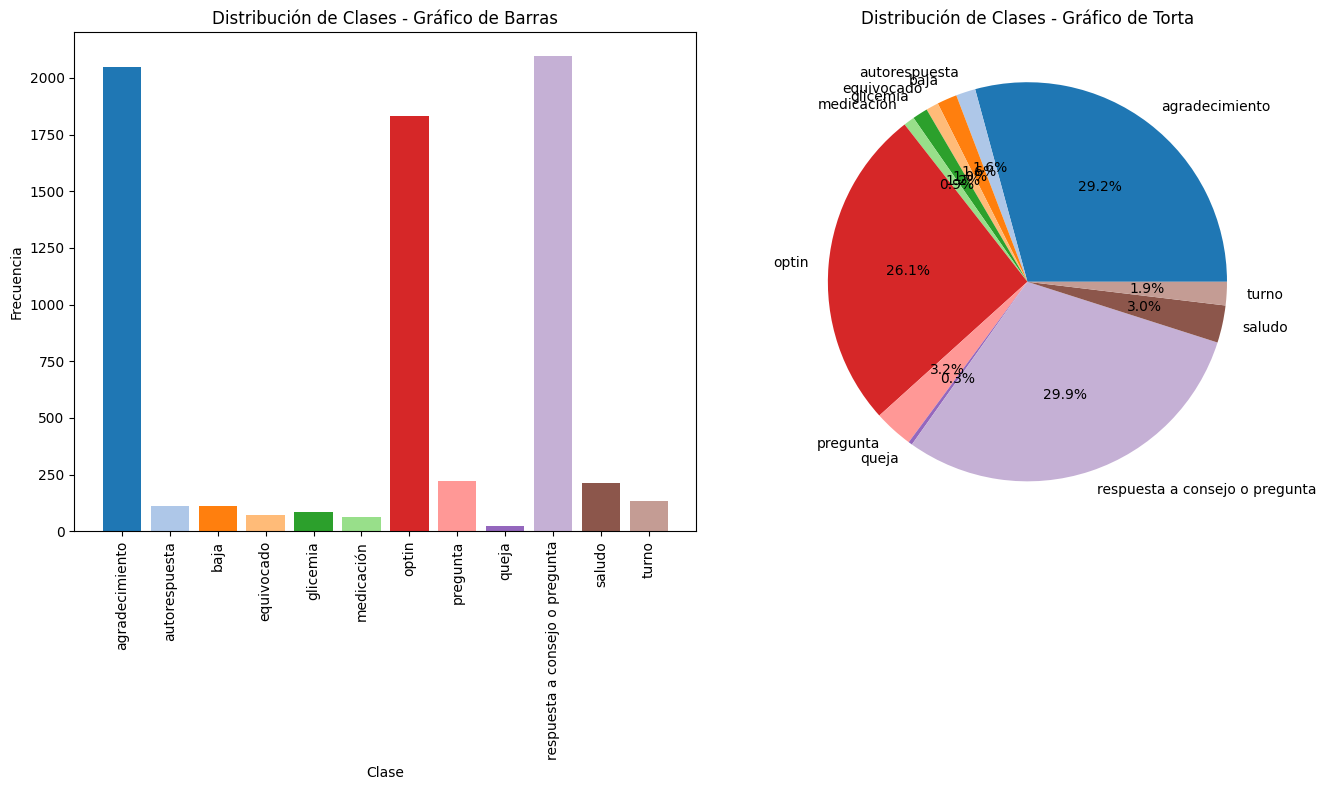

In [37]:
import matplotlib.pyplot as plt

# Calcular las frecuencias de cada clase
class_counts = df['clase'].value_counts().sort_index()

print(class_counts)

# Colores consistentes para cada clase
colors = plt.get_cmap('tab20')

# Crear el subplot de 1 fila y 2 columnas con espacio adicional para la tabla
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Gráfico de barras
ax[0].bar(class_counts.index, class_counts.values, color=colors(range(len(class_counts))))
ax[0].set_title('Distribución de Clases - Gráfico de Barras')
ax[0].set_xlabel('Clase')
ax[0].set_ylabel('Frecuencia')
ax[0].tick_params(axis='x', rotation=90)  # Rotar las etiquetas del eje x

# Gráfico de torta
ax[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', colors=colors(range(len(class_counts))))
ax[1].set_title('Distribución de Clases - Gráfico de Torta')


# Ajustar el layout
plt.tight_layout()
plt.show()

Agrupación de Clases


In [38]:
# agrupar clases#

df.loc[df['clase'] == 'agradecimiento', 'clase'] = 'agradecimiento o saludo'
df.loc[df['clase'] == 'saludo', 'clase'] = 'agradecimiento o saludo'
df.loc[df['clase'] == 'medicación', 'clase'] = 'medicación o turno'
df.loc[df['clase'] == 'turno', 'clase'] = 'medicación o turno'
df.loc[df['clase'] == 'queja', 'clase'] = 'otros'
df.loc[df['clase'] == 'pregunta', 'clase'] = 'otros'
df.loc[df['clase'] == 'autorespuesta', 'clase'] = 'otros'
df.loc[df['clase'] == 'respuesta a consejo o pregunta', 'clase'] = 'respuesta'

clase
agradecimiento o saludo    2260
baja                        113
equivocado                   71
glicemia                     87
medicación o turno          195
optin                      1832
otros                       355
respuesta                  2096
Name: count, dtype: int64


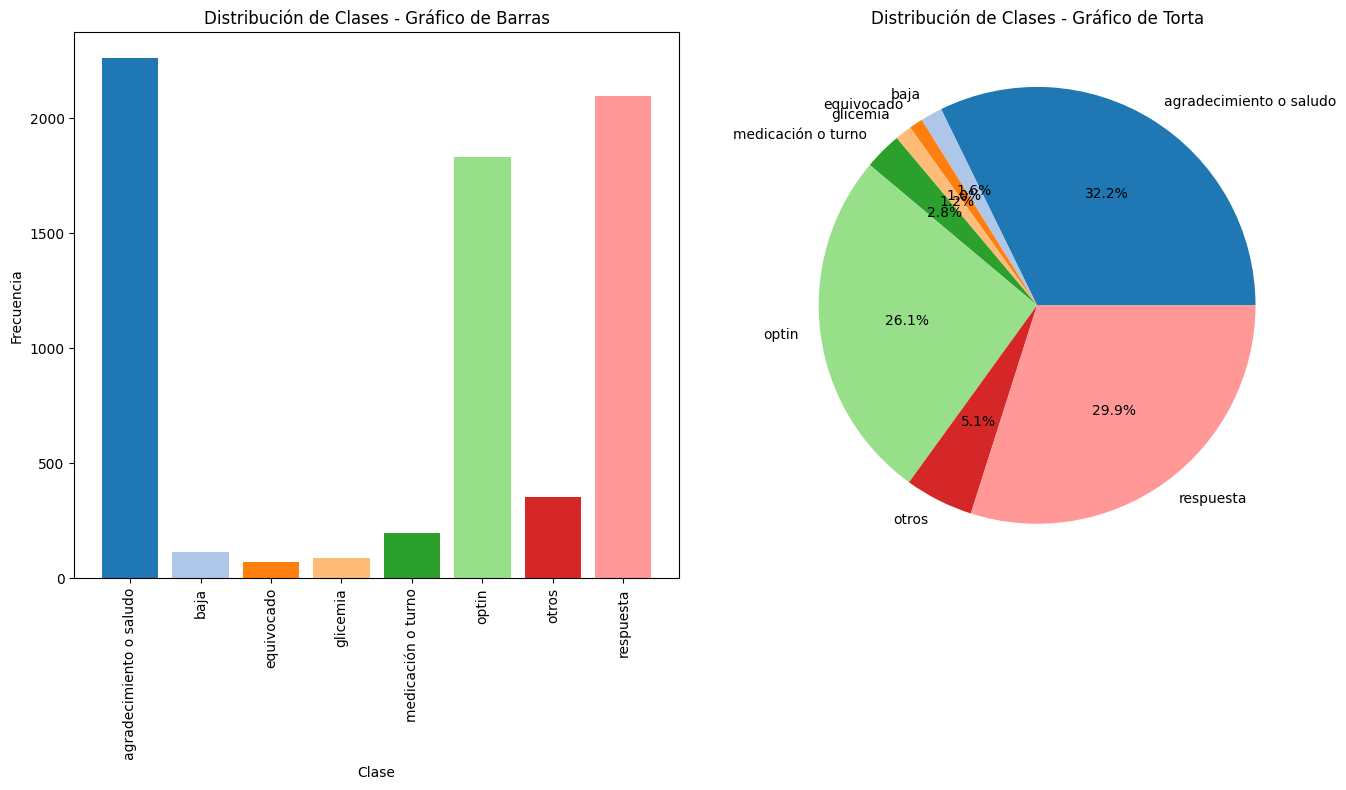

In [39]:
# Calcular las frecuencias de cada clase
class_counts = df['clase'].value_counts().sort_index()

print(class_counts)

# Colores consistentes para cada clase
colors = plt.get_cmap('tab20')

# Crear el subplot de 1 fila y 2 columnas con espacio adicional para la tabla
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Gráfico de barras
ax[0].bar(class_counts.index, class_counts.values, color=colors(range(len(class_counts))))
ax[0].set_title('Distribución de Clases - Gráfico de Barras')
ax[0].set_xlabel('Clase')
ax[0].set_ylabel('Frecuencia')
ax[0].tick_params(axis='x', rotation=90)  # Rotar las etiquetas del eje x

# Gráfico de torta
ax[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', colors=colors(range(len(class_counts))))
ax[1].set_title('Distribución de Clases - Gráfico de Torta')


# Ajustar el layout
plt.tight_layout()
plt.show()

Vectorización del Texto Usando TF-IDF

In [40]:
# Check the data types of your DataFrame
print(df.dtypes)

# If 'recibido' is not of type object (string), convert it
if df['recibido'].dtype != object:
    df['recibido'] = df['recibido'].astype(str)

# Check for any remaining non-string values in 'recibido'
non_string_values = df['recibido'][~df['recibido'].apply(lambda x: isinstance(x, str))]
print("Non-string values in 'recibido':", non_string_values)

# Handle the non-string values (e.g., replace with empty strings)
df['recibido'] = df['recibido'].apply(lambda x: x if isinstance(x, str) else '')

# Vectorización del texto usando TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['recibido'])
y = df['clase']

recibido    object
clase       object
dtype: object
Non-string values in 'recibido': 782    9
Name: recibido, dtype: object


In [41]:
X_tfidf

<7009x2998 sparse matrix of type '<class 'numpy.float64'>'
	with 28465 stored elements in Compressed Sparse Row format>

# División de Datos en Conjuntos de Entrenamiento y Prueba




In [42]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


Entrenamiento y Evaluación del Modelo Random Forest

In [43]:
# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.8609129814550642
                         precision    recall  f1-score   support

agradecimiento o saludo       0.90      0.93      0.91       476
                   baja       1.00      0.62      0.77        16
             equivocado       0.85      0.65      0.73        17
               glicemia       1.00      0.12      0.21        17
     medicación o turno       1.00      0.23      0.37        35
                  optin       0.99      0.93      0.96       364
                  otros       0.83      0.48      0.61        81
              respuesta       0.73      0.90      0.81       396

               accuracy                           0.86      1402
              macro avg       0.91      0.61      0.67      1402
           weighted avg       0.88      0.86      0.85      1402



## Procesamiento para redes neuronales (RNN, LSTM, GRU)

Tokenización y Secuencias

In [44]:
# Tokenización y secuencias
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['recibido'])
X_seq = tokenizer.texts_to_sequences(df['recibido'])
max_length = max([len(x) for x in X_seq])
X_padded = pad_sequences(X_seq, maxlen=max_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Convertir etiquetas a numéricas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_seq = le.fit_transform(y_train_seq)
y_test_seq = le.transform(y_test_seq)

Embeddings Aprendidos del Corpus de Entrenamiento

In [46]:
# Modelos RNN, LSTM y GRU
def create_rnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
    model.add(SpatialDropout1D(0.2))
    model.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Entrenamiento y evaluación del modelo RNN (LSTM)
rnn_model = create_rnn_model()
rnn_model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=64, validation_split=0.1)
y_pred_rnn = rnn_model.predict(X_test_seq)
y_pred_rnn = np.argmax(y_pred_rnn, axis=1)
print("RNN (LSTM) Model")
print(f"Accuracy: {accuracy_score(y_test_seq, y_pred_rnn)}")
print(classification_report(y_test_seq, y_pred_rnn, target_names=le.classes_))

# Entrenamiento y evaluación del modelo GRU
gru_model = create_gru_model()
gru_model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=64, validation_split=0.1)
y_pred_gru = gru_model.predict(X_test_seq)
y_pred_gru = np.argmax(y_pred_gru, axis=1)
print("GRU Model")
print(f"Accuracy: {accuracy_score(y_test_seq, y_pred_gru)}")
print(classification_report(y_test_seq, y_pred_gru, target_names=le.classes_))













output_path = '/content/drive/MyDrive/UCU-NLP/resultados_clasificacion.xlsx'
results.to_excel(output_path, index=False)

print(f"Resultados guardados en: {output_path}")

Epoch 1/5
79/79 [==============================] - 92s 1s/step - loss: 1.2439 - accuracy: 0.5961 - val_loss: 0.7474 - val_accuracy: 0.7950
Epoch 2/5
79/79 [==============================] - 80s 1s/step - loss: 0.6530 - accuracy: 0.8068 - val_loss: 0.5681 - val_accuracy: 0.8128
Epoch 3/5
79/79 [==============================] - 78s 995ms/step - loss: 0.5115 - accuracy: 0.8413 - val_loss: 0.4895 - val_accuracy: 0.8324
Epoch 4/5
79/79 [==============================] - 77s 979ms/step - loss: 0.4066 - accuracy: 0.8757 - val_loss: 0.4382 - val_accuracy: 0.8592
Epoch 5/5
44/44 [==============================] - 3s 75ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RNN (LSTM) Model
Accuracy: 0.8630527817403709
                         precision    recall  f1-score   support

agradecimiento o saludo       0.93      0.90      0.92       476
                   baja       1.00      0.62      0.77        16
             equivocado       0.88      0.41      0.56        17
               glicemia       0.00      0.00      0.00        17
     medicación o turno       0.40      0.60      0.48        35
                  optin       0.99      0.94      0.96       364
                  otros       0.78      0.47      0.58        81
              respuesta       0.76      0.92      0.83       396

               accuracy                           0.86      1402
              macro avg       0.72      0.61      0.64      1402
           weighted avg       0.87      0.86      0.86      1402

Epoch 1/5
79/79 [==============================] - 78s 951ms/step - loss: 1.1980 - accuracy: 0.6520 - val_loss: 0.6911 - val_accuracy: 0.7647
Epoch 2/5
79/79 [============

ValueError: y contains previously unseen labels: ['agradecimiento o saludo' 'baja' 'equivocado' 'glicemia'
 'medicación o turno' 'optin' 'otros' 'respuesta']

In [ ]:
# Get the original labels for y_test_seq
y_test_original = le.inverse_transform(y_test_seq)

# Guardar los resultados en un archivo Excel
results = pd.DataFrame({
    'y_test': y_test_original, # Use original labels
    'y_pred_rf': rf_model.predict(X_test_tfidf),  # No need to inverse transform here
    'y_pred_rnn': le.inverse_transform(y_pred_rnn),
    'y_pred_gru': le.inverse_transform(y_pred_gru)
})



In [ ]:

output_path = '/content/drive/MyDrive/UCU-NLP/resultados_clasificacion.xlsx'
results.to_excel(output_path, index=False)

print(f"Resultados guardados en: {output_path}")

Resultados guardados en: /content/drive/MyDrive/UCU-NLP/resultados_clasificacion.xlsx


In [47]:
# Evaluación de los modelos
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))


print("RNN (LSTM) Model")
print(f"Accuracy: {accuracy_score(y_test_seq, y_pred_rnn)}")
print(classification_report(y_test_seq, y_pred_rnn, target_names=le.classes_))

print("GRU Model")
print(f"Accuracy: {accuracy_score(y_test_seq, y_pred_gru)}")
print(classification_report(y_test_seq, y_pred_gru, target_names=le.classes_))


Random Forest Classifier
Accuracy: 0.8609129814550642
                         precision    recall  f1-score   support

agradecimiento o saludo       0.90      0.93      0.91       476
                   baja       1.00      0.62      0.77        16
             equivocado       0.85      0.65      0.73        17
               glicemia       1.00      0.12      0.21        17
     medicación o turno       1.00      0.23      0.37        35
                  optin       0.99      0.93      0.96       364
                  otros       0.83      0.48      0.61        81
              respuesta       0.73      0.90      0.81       396

               accuracy                           0.86      1402
              macro avg       0.91      0.61      0.67      1402
           weighted avg       0.88      0.86      0.85      1402

RNN (LSTM) Model
Accuracy: 0.8630527817403709
                         precision    recall  f1-score   support

agradecimiento o saludo       0.93      0.90      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
